In [4]:
# -------- Code Outline -------- #
# Code splits the de-noised data into segments
# Each segment will contain only one heart beat
# As result of CA's, these will be beats of different lengths
# Depending upon the heart rate at that time
# In order to do this we will implement the beats in such a way that they begin 2/3rd
# Of the previous beat and end at 1/3rd of the next beat

import numpy as np
import matplotlib.pyplot as plt 
import pickle

In [41]:
names = [100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,122,123,124,200,201,202,
        203,205,207,208,209,210,212,213,214,215,217,219,220,221,222,223,228,230,231,232,233,234]

for i,name in enumerate(names):
    print(i)
    # Load in the peaks
    with open('adb final labels/adb peaks/{}_peaks.pkl'.format(i), 'rb') as f:
        peaks = pickle.load(f)

    # Load in the de-noised original data
    with open('adb de-noised/{}_de-noised.pkl'.format(i), 'rb') as f:
        Data = pickle.load(f)
        
    # -------- Segmentation -------- #
    # Split the beats up into segments based on the peak array

    # Find the 2/3rd point of the first peak distance
    # All starting from the 2/3rd point of the previous interval
    # and ending at 1/3 of the next interval 

    # 2/3rd into first peak distance
    initial_point = int(round(peaks[0] * (2/3)))

    # Split the data into segmented chunks
    segments = []
    # Loop over all the beats, splitting into segments
    # Do this until every peak has been covered (every beat)

    beats = len(peaks)
    for j in range(1,beats):
        #print(initial_point)
        end_point = peaks[j - 1] + int(round(peaks[j] - peaks[j - 1]) * (2/3))
        segments.append(Data[initial_point:end_point,:])

        # Now reset the initial point as 2/3rd of the next RR interval
        initial_point = (peaks[j - 1] + int(round((peaks[j] - peaks[j - 1]) * (2/3))))
        
    with open('Segmented Data/Segments/{}_segments.pkl'.format(i), 'wb') as f:
        pickle.dump(segments, f)
       
    
    
    # I also need to delete the last label in the labels list:
    with open('adb final labels/adb beat labels/{}_beat_labels.pkl'.format(i), 'rb') as f:
        Labels = pickle.load(f)
        
    del Labels[-1]
    
    with open('Segmented Data/Segment Labels/{}_labels.pkl'.format(i), 'wb') as f:
        pickle.dump(Labels, f)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


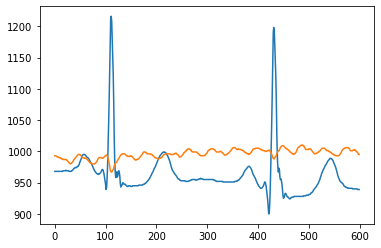

In [42]:
with open('adb de-noised/{}_de-noised.pkl'.format(1), 'rb') as f:
        Data = pickle.load(f)
        
plt.plot(Data[600:1200])

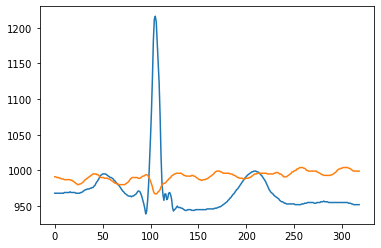

In [43]:
with open('Segmented Data/Segments/{}_segments.pkl'.format(1), 'rb') as f:
        seg = pickle.load(f)
        plt.plot(seg[2])

In [59]:
print(len(segments))
print(len(Labels))

2752
2752


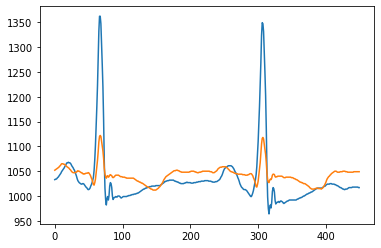

In [18]:
plt.plot(Data[300:750])

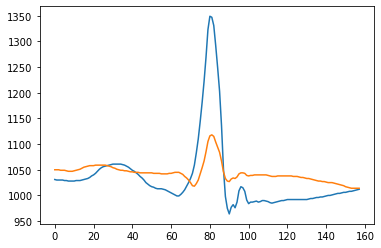

In [20]:
plt.plot(segments[2])

In [64]:
with open('Segmented Data/Segments/0_segments.pkl', 'rb') as f:
        segments = pickle.load(f)
segments = np.array(segments)
print(segments[0].shape[-1])

2


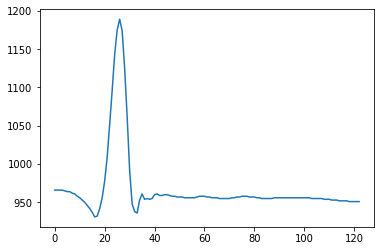

In [61]:
# Because all the segments are different lengths, when indexing it you have to think about it as a list of arrays.
# So you use list indexing style to pick which ever segment, then use the numpy indexing style to get the lead.
plt.plot(segments[0][:,0])

In [1]:
with open('Segmented Data/Segments/0_segments.pkl', 'rb') as f:
        segments = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'Segmented Data/Segments/0_segments.pkl'